In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib
import numpy as np
from joypy import joyplot
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import (KNeighborsClassifier,
                               NeighborhoodComponentsAnalysis)
import pickle

In [2]:
# setting up the path to read the datafiles
root = './lib/data/*final.csv'
files = glob.glob(root)
print(files)

for file in files:
    df = pd.read_csv(file)
#df = df.drop_duplicates()
df

['./lib/data/winequality-final.csv']


,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.000000,3
1,red,8.3,1.020,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.000000,3
2,red,10.4,0.610,0.49,2.1,0.200,5.0,16.0,0.99940,3.16,0.63,8.400000,3
3,red,7.3,0.980,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.700000,3
4,red,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.800000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.6,0.340,0.40,8.1,0.046,68.0,170.0,0.99494,3.15,0.50,9.533333,6
6493,white,6.6,0.340,0.40,8.1,0.046,68.0,170.0,0.99494,3.15,0.50,9.533333,6
6494,white,6.0,0.410,0.23,1.1,0.066,22.0,148.0,0.99266,3.30,0.47,9.633333,5
6495,white,5.2,0.220,0.46,6.2,0.066,41.0,187.0,0.99362,3.19,0.42,9.733333,5


# Data Exploration

In [3]:
# describe all wines
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
#describe red wines
df[df['type']=='red'].describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
#describe white wines
df[df['type']=='white'].describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [6]:
def bar_plot(df_series, colors, fig_title, wine_type,ticks = None):
    df_series=df_series.sort_index()
    plt.figure()
    plt.bar(x=df_series.index,height=df_series, color =colors)
    plt.xlabel('Quality', fontsize=20)
    plt.ylabel('Counts', fontsize=20)
    if ticks:
        plt.xticks(ticks[0], ticks[1])
        plt.title('Type of Wines Count')
    else:
        plt.title(f'{wine_type.capitalize()} Wine Quality distribution', fontsize=20)
    plt.savefig(fig_title, dpi=600)
    return plt.show()

In [7]:
def correlation_matrix(df, labels, fig_title, wine_type):
    correlation = df.corr()
    plt.subplots(figsize=(15,10))
    sn.set(font_scale=1.8)
    ax = sn.heatmap(correlation, annot=True, fmt=".1f",cmap='viridis',linewidths=2.,xticklabels=labels,yticklabels=labels)
    ax.set_title(f'Correlation Matrix for {wine_type} wines', fontsize=25)
    plt.savefig(fig_title, dpi=600)
    return plt.show()

In [8]:
col_list = set(df.columns)
col_list

{'alcohol',
 'chlorides',
 'citric_acid',
 'density',
 'fixed_acidity',
 'free_sulfur_dioxide',
 'pH',
 'quality',
 'residual_sugar',
 'sulphates',
 'total_sulfur_dioxide',
 'type',
 'volatile_acidity'}

In [9]:
def ridgeline_plot(df,category, columns, figname, ylabel=None):
    ax, fig = joyplot(
        data=df, 
        by=category,
        column=columns,
        #color=['#686de0', '#eb4d4b'],
        legend=True,
        alpha=0.85,
        grid="y",
        figsize=(12, 8)
    )
    plt.savefig(figname,dpi=600)
    return plt.show()

# Multi Linear Regression

In [10]:
def dataset_split(X,y):
#divide the data into training and testing set 
    X_train, X_test,y_train,y_test=train_test_split(X,y, random_state=42)
    return X_train, X_test,y_train,y_test
#Creating the linear regression model and fitting the data to it
def multilinear_regression(X,y,path='./lib/models/LinearRegression.pkl'):
    
    X_train,X_test,y_train,y_test = dataset_split(X,y)
    RG=make_pipeline(StandardScaler(),LinearRegression())
    regression = RG.fit(X_train,y_train)
    
    with open(path, 'wb') as file:
        pickle.dump(regression, file)
    y_predict = regression.predict(X_test)
        # The coefficients
    print('Coefficients:')
    for x,cf in enumerate(regression[1].coef_):
        print(f"{X.columns[x]} = {cf}")
    # The intercept
    print('Intercept: %.2f' 
         % regression[1].intercept_)
    # The mean squared error
    print('Mean squared error: %.2f'
          % mean_squared_error(y_test, y_predict))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
          % r2_score(y_test, y_predict))
    if r2_score(y_test,y_predict) < 0.7 and mean_squared_error(y_test, y_predict) < 0.7:
        print('the dataset is NOT well represented by a linear model')
    return regression

# Principal Component Analysis

In [11]:
def make_pca(n_components=None):
        pca = make_pipeline(StandardScaler(),
                        PCA(n_components=n_components, random_state=42))
        return pca
def number_components_pca(X):
    results = make_pca().fit(X) # applies PCA on predictor variables
    EVR = results[1].explained_variance_ratio_
    plt.figure()
    plt.plot(EVR, marker='o')
    plt.plot(1-EVR, marker='o')
    plt.xlabel('number of features')
    plt.ylabel('Variance')
    plt.show()
    print(1-EVR)
    print(np.where(np.isclose(1-EVR, 0.90, rtol=0,atol=0.02)))
    print(f'The first {np.where(np.isclose(1-EVR, 0.90, rtol=0,atol=0.02))[0][0]+1} components are explaining the whole dataset (90% of variance)')
    print('The first two principal components alone explain {:.2f} of the variance'.format(1-EVR[1]))
    return np.where(np.isclose(1-EVR, 0.90, rtol=0,atol=0.03))[0][0]+1

# Dimension Reduction with PCA and Classification with kNN

In [12]:
def kNN_classification(X,y,n_neighbors,n_components,wine,class_names,ticks=None,model_descriptor = None):
    X_train,X_test,y_train,y_test = dataset_split(X,y)
    # Use a nearest neighbor classifier to evaluate the methods
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    pca = make_pca(n_components).fit(X_train,y_train)
    path=f'./lib/models/pca_{model_descriptor}.pkl'
    with open(path, 'wb') as file:
        pickle.dump(pca, file)
    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(pca.transform(X_train), y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(pca.transform(X_test), y_test)
    
    path=f'./lib/models/kNN_{model_descriptor}.pkl'
    with open(path, 'wb') as file:
        pickle.dump(knn, file)
    
    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = pca.transform(X)
    labels = y.unique()
   
    # Plot the projected points and show the evaluation score
    plt.figure()
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y,  cmap='Accent',alpha=0.5, label=labels)
    plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format('PCA',
                                                                  n_neighbors,
                                                                  acc_knn))
    plt.xlabel('PC 1')
    plt.ylabel('PC 2')
    plt.savefig(f'images/{wine}_PCA_dimension_reduction',dpi=600)
    plt.show()
    
    # confusion Matrix
    pred = knn.predict(pca.transform(X_test))
    c_m = confusion_matrix(pred,y_test)
    plt.figure(figsize=(10,6))
    plot_confusion_matrix(knn, pca.transform(X_test), y_test)
    if ticks:
        plt.xticks(ticks[0], ticks[1])
        plt.yticks(ticks[0], ticks[1],rotation='vertical',va='center')
    plt.title(class_names)
    plt.savefig(f'images/{wine}_confusion',dpi=600)
    return knn, pca

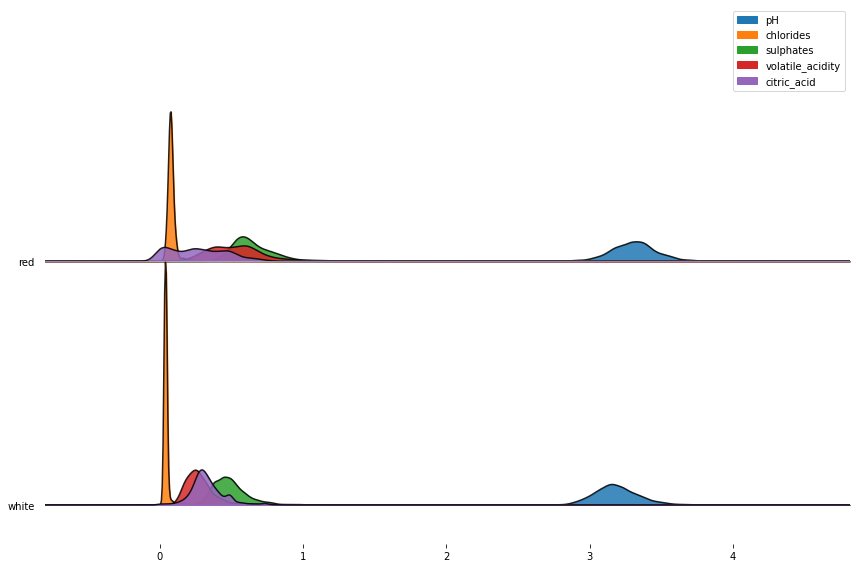

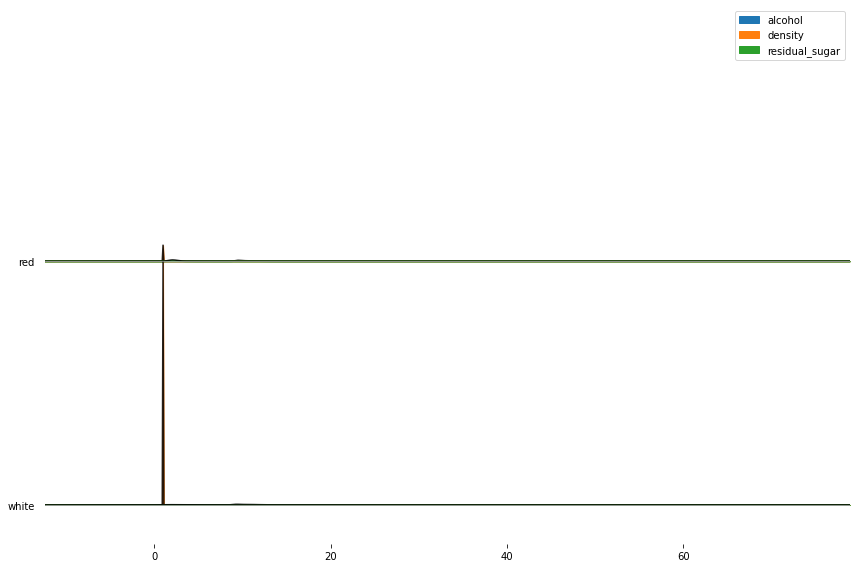

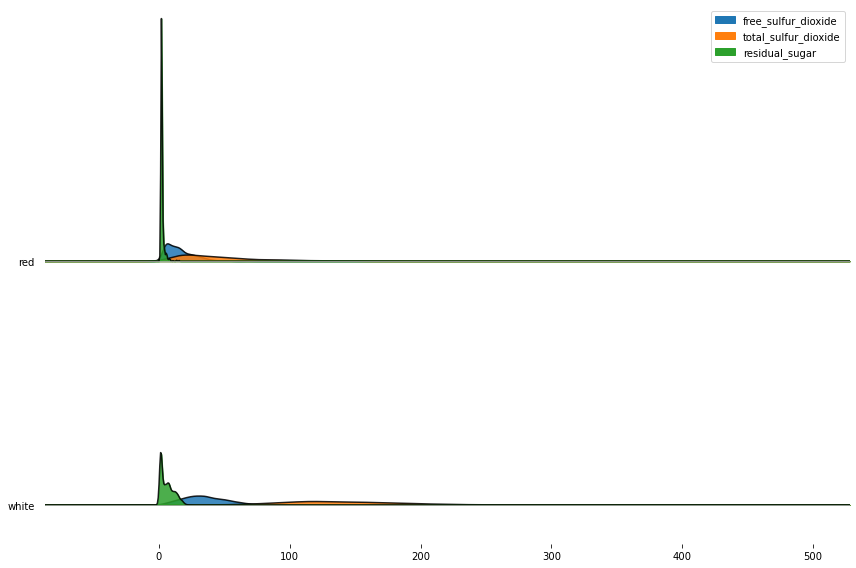

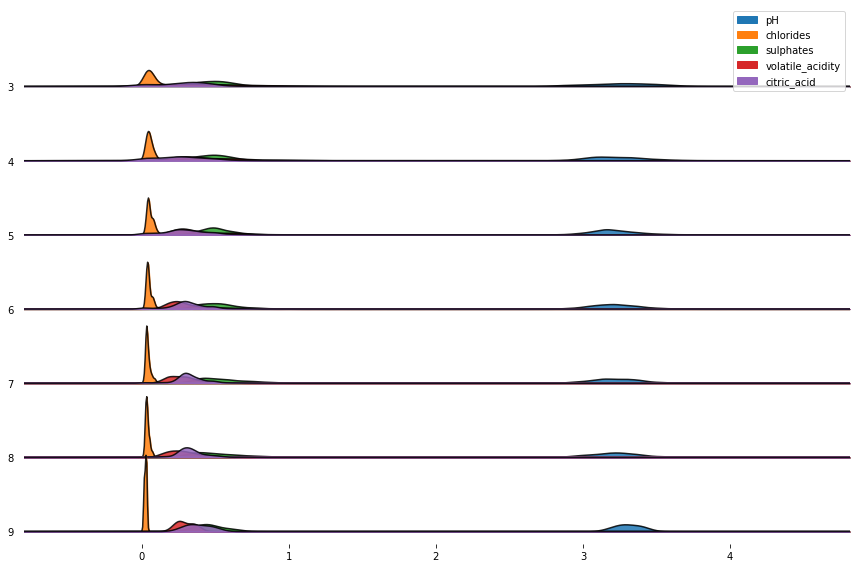

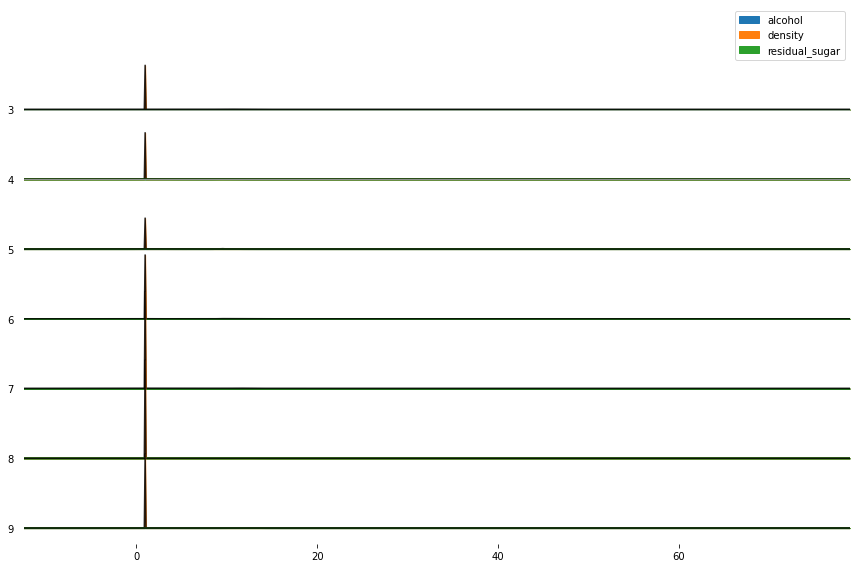

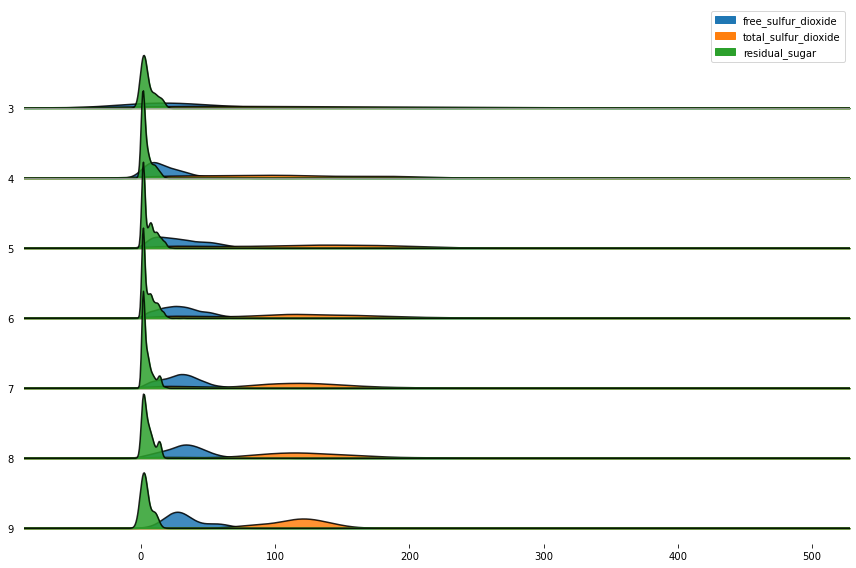

In [13]:
for descriptor in ['type','quality']:
    figure_names = [f'images/wine_{descriptor}_pH.png',\
                f'images/wine_{descriptor}_density.png',
                f'images/wine_{descriptor}_sulfur.png']
    
    for idx,col in enumerate([['pH','chlorides','sulphates','volatile_acidity','citric_acid'],\
                ['alcohol','density','residual_sugar'],\
                ['free_sulfur_dioxide','total_sulfur_dioxide','residual_sugar']]):
        ridgeline_plot(df[col_list],descriptor,col,figure_names[idx])

In [14]:
def ML_wine_quality(df,wine_type, column_target):

    df_wine = pd.get_dummies(df, columns=['type'])
    if wine_type != 'all':
        df_wine = df_wine[df_wine[f'type_{wine_type}'] == 1]
        
    type_column = list(df_wine.filter(regex='type_').columns)
    df_wine = df_wine.drop(columns=type_column[1])
    if column_target == 'type':
        column_target = [type_column[0]]
        column_target.extend(['quality'])
        ticks = [[0,1],['white','red']]
        conf_name = f'{column_target[0]} predictions' 
    else:
        column_target = [column_target]
        column_target.extend([type_column[0]])
        conf_name = f'{wine_type.capitalize()} Wine {column_target[0]} predictions'
        ticks=None
  
    # we want to see the distribution of our wine quality
    df_quality = df_wine[column_target[0]].value_counts()
    colors = ['red','red','blue','blue','blue','green','green']
    fig_title = f'images/{wine_type}_wines_{column_target}_distribution_bar.png'
    bar_plot(df_quality,colors,fig_title,wine_type,ticks=ticks)
    
    if column_target == 'quality':
        column_target.extend([type_column[0]])
        df_corr = df_wine.drop(columns=column_target)
        corr_lbl = ['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual Sugar', 'Chlorides','Free Sulfur Dioxide', 'Total Sulfur Dioxide', 'Density', 'pH','Sulphates', 'Alcohol']
        fig_title = f'images/{wine_type}_full_correlation_matrix.png'
        correlation_matrix(df_corr,corr_lbl,fig_title, wine_type)

    
    # setting up the data for quality evaluation
    X = df_wine.drop(columns=column_target)
    y = df_wine[column_target[0]]
    df_wine.to_csv(f'./lib/data/{column_target[0]}_db.csv', index=False)
    #multilinear regression
    regr = multilinear_regression(X,y)
    
    # find the optimal number of components
    matplotlib.rc_file_defaults()
    n_components = number_components_pca(X)
    
    #dimension reduction and classification 
    n_neighbors = 3
    knn, pca = kNN_classification(X,y,n_neighbors,n_components,wine_type, conf_name, ticks, model_descriptor=column_target[0])
    return regr,knn,pca

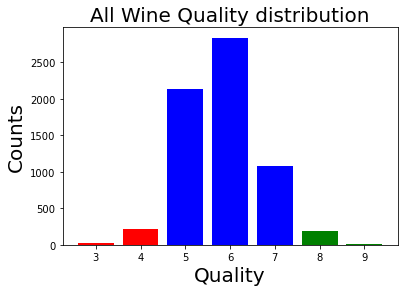

Coefficients:
fixed_acidity = 0.09795230072535561
volatile_acidity = -0.20780631943700206
citric_acid = -0.018574136523423324
residual_sugar = 0.22269481957179785
chlorides = -0.016108095836567762
free_sulfur_dioxide = 0.08973213606525714
total_sulfur_dioxide = -0.14070283688126828
density = -0.18381448544766954
pH = 0.06540781672841614
sulphates = 0.11395562812598876
alcohol = 0.3085249424807328
Intercept: 5.82
Mean squared error: 0.53
Coefficient of determination: 0.31
the dataset is NOT well represented by a linear model


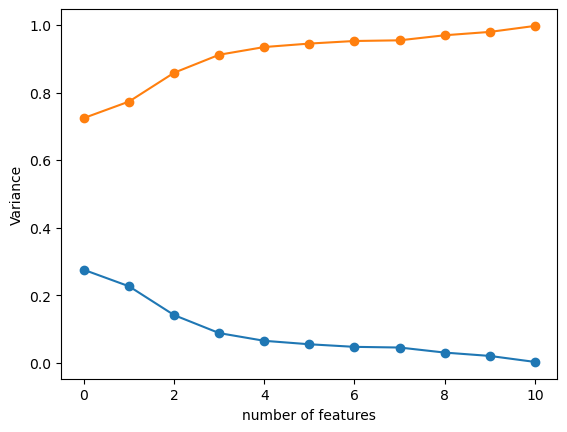

[0.7245574  0.77328854 0.85851391 0.91176799 0.93455683 0.94478984
 0.95244011 0.95440816 0.96936145 0.97930039 0.99701538]
(array([3]),)
The first 4 components are explaining the whole dataset (90% of variance)
The first two principal components alone explain 0.77 of the variance


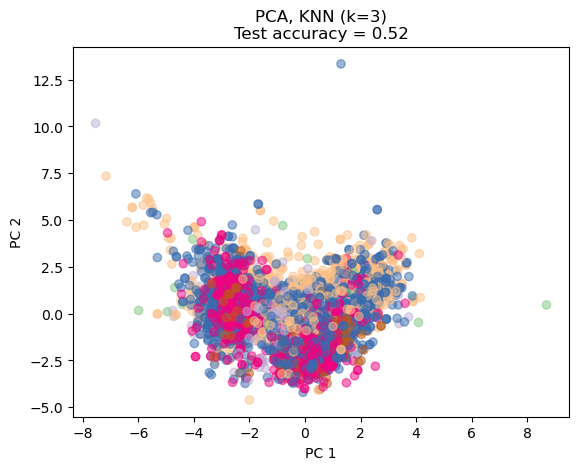

<Figure size 1000x600 with 0 Axes>

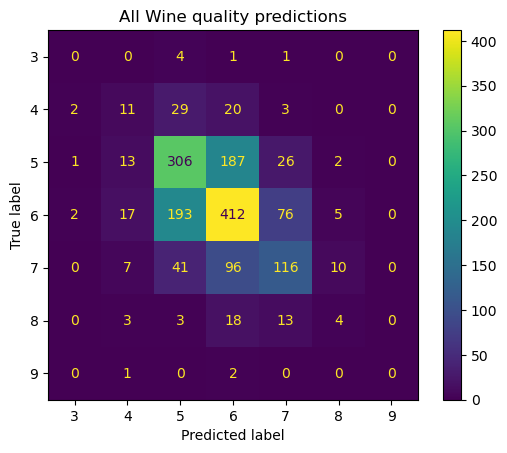

In [15]:
wtype = ['red','white','all']
wine = wtype[2]
#for wine in wtype:
r,knn,pca = ML_wine_quality(df,wine,'quality')

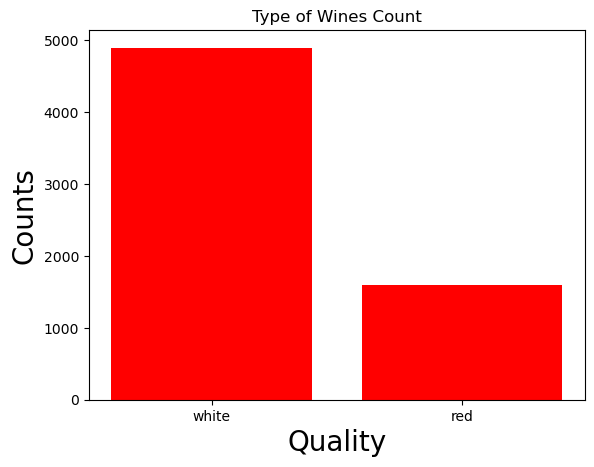

Coefficients:
fixed_acidity = -0.052113185864012694
volatile_acidity = 0.07707850486349233
citric_acid = -0.018858149136539562
residual_sugar = -0.23887897058342142
chlorides = 0.02939963356705806
free_sulfur_dioxide = 0.050171191299617265
total_sulfur_dioxide = -0.16532623833641485
density = 0.3865985957139597
pH = -0.022612709214987668
sulphates = 0.020673827926683735
alcohol = 0.13615975223712892
Intercept: 0.24
Mean squared error: 0.03
Coefficient of determination: 0.86


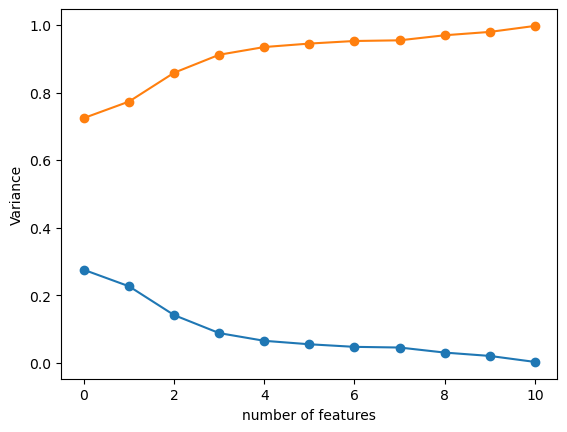

[0.7245574  0.77328854 0.85851391 0.91176799 0.93455683 0.94478984
 0.95244011 0.95440816 0.96936145 0.97930039 0.99701538]
(array([3]),)
The first 4 components are explaining the whole dataset (90% of variance)
The first two principal components alone explain 0.77 of the variance


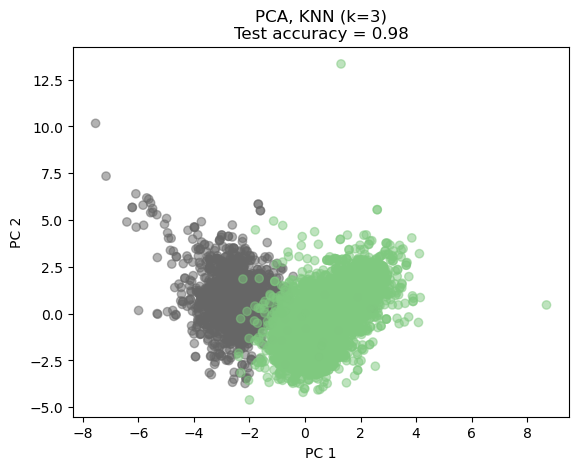

<Figure size 1000x600 with 0 Axes>

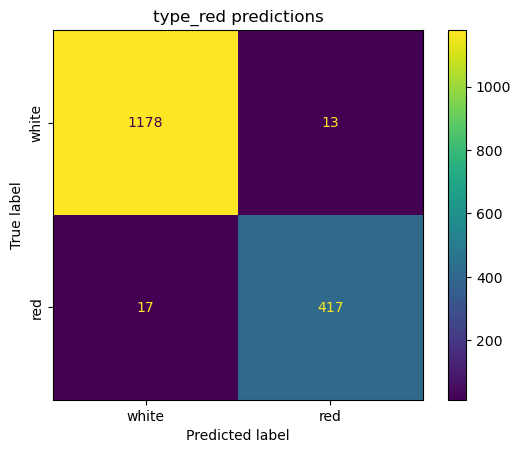

In [16]:
t_r,t_knn,t_pca = ML_wine_quality(df,'all', 'type')

In [17]:
df

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.000000,3
1,red,8.3,1.020,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.000000,3
2,red,10.4,0.610,0.49,2.1,0.200,5.0,16.0,0.99940,3.16,0.63,8.400000,3
3,red,7.3,0.980,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.700000,3
4,red,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.800000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.6,0.340,0.40,8.1,0.046,68.0,170.0,0.99494,3.15,0.50,9.533333,6
6493,white,6.6,0.340,0.40,8.1,0.046,68.0,170.0,0.99494,3.15,0.50,9.533333,6
6494,white,6.0,0.410,0.23,1.1,0.066,22.0,148.0,0.99266,3.30,0.47,9.633333,5
6495,white,5.2,0.220,0.46,6.2,0.066,41.0,187.0,0.99362,3.19,0.42,9.733333,5


In [18]:
data = pd.DataFrame.from_dict({'alcohol': [9.5],
 'chlorides':[0.046],
 'citric_acid': [0.4],
 'fixed_acidity': [5.2],
 'free_sulfur_dioxide': [68],
 'total_sulfur_dioxide':[182],
 'density':[1],
 'pH':[3.15],
 'residual_sugar': [8.1],
 'sulphates':[0.5],
 'volatile_acidity':[0.340]}, orient='columns')

In [19]:
def wine_quality(prediction):
    if prediction < 5 :
        quality = 'Poor Quality '
    elif prediction > 7:
        quality = 'Good Quality '
    else:
        quality = 'Average Quality '
    print(quality, ' Wine')
    return quality

In [20]:
def wine_type(prediction):
    if prediction == 0:
        wtype='white'
    else:
        wtype='red'
    print(wtype.capitalize(), ' wine')
    return wtype

In [21]:
wine_predt = t_knn.predict(t_pca.transform(data))
print(wine_predt)
wine_type(wine_predt)


[1]
Red  wine


'red'

In [22]:

pr = r.predict(data)
wine_quality(pr)

Poor Quality   Wine


'Poor Quality '

In [23]:
new_point = knn.predict(pca.transform(data))
print(new_point)
wine_quality(new_point)

[4]
Poor Quality   Wine


'Poor Quality '